# HOUSE PRICES - ADVANCED REGRESSION TECHNIQUES

This is a dataset containing 41 explanatory variables describing (almost) every aspect of residential homes in California.
data set available at this link: https://www.kaggle.com/datasets/quantbruce/californiahouseprices

Here I will compare several regression techniques:

Simple linear regression using features with highest correlation with target variable
Linear regression with Ridge/Lasso regularization
Principal Component Analysis


Quick notes:

For simplicity, I will use only the 'train' dataset for the analysis, splitting it into train+test (in order not to repeat the whole feature engineer process on the test dataset) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(5)


,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


# EXPLORATORY DATA ANALYSIS 

In [4]:
train.columns

Index(['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Total spaces',
       'Garage spaces', 'Region', 'Elementary School',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School', 'Middle School Score', 'Middle School Distance',
       'High School', 'High School Score', 'High School Distance', 'Flooring',
       'Heating features', 'Cooling features', 'Appliances included',
       'Laundry features', 'Parking features', 'Tax assessed value',
       'Annual tax amount', 'Listed On', 'Listed Price', 'Last Sold On',
       'Last Sold Price', 'City', 'Zip', 'State'],
      dtype='object')

In [5]:
train.count()

Id                             47439
Address                        47439
Sold Price                     47439
Summary                        47089
Type                           47439
Year built                     46394
Heating                        40974
Cooling                        36817
Parking                        46531
Lot                            33258
Bedrooms                       44567
Bathrooms                      43974
Full bathrooms                 39574
Total interior livable area    44913
Total spaces                   46523
Garage spaces                  46522
Region                         47437
Elementary School              42697
Elementary School Score        42543
Elementary School Distance     42697
Middle School                  30735
Middle School Score            30734
Middle School Distance         30735
High School                    42439
High School Score              42220
High School Distance           42438
Flooring                       35875
H

In [6]:
train.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,47439.000000,4.743900e+04,46394.000000,3.325800e+04,43974.000000,39574.000000,4.491300e+04,46523.000000,46522.000000,42543.000000,42697.000000,30734.000000,30735.000000,42220.000000,42438.000000,4.378700e+04,43129.000000,4.743900e+04,2.967300e+04,47439.000000
mean,23719.000000,1.296050e+06,1956.634888,2.353383e+05,2.355642,2.094961,5.774587e+03,1.567117,1.491746,5.720824,1.152411,5.317206,1.691593,6.134344,2.410366,7.863118e+05,9956.843817,1.315890e+06,8.078537e+05,93279.178587
std,13694.604047,1.694452e+06,145.802456,1.192507e+07,1.188805,0.963320,8.324363e+05,9.011608,8.964319,2.103350,2.332367,2.002768,2.462879,1.984711,3.596120,1.157796e+06,13884.254976,2.628695e+06,1.177903e+06,2263.459104
min,0.000000,1.005000e+05,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,11859.500000,5.650000e+05,1946.000000,4.991000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.549615e+05,3467.000000,5.745000e+05,3.350000e+05,90220.000000
50%,23719.000000,9.600000e+05,1967.000000,6.502000e+03,2.000000,2.000000,1.566000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.475240e+05,7129.000000,9.490000e+05,5.980000e+05,94114.000000
75%,35578.500000,1.525000e+06,1989.000000,1.045400e+04,3.000000,2.000000,2.142000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.000000,2.400000,9.371625e+05,12010.000000,1.498844e+06,9.500000e+05,95073.000000
max,47438.000000,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,9.000000e+07,96155.000000


we have 41 features and 47439 samples

we need to check the several columns in order to manipulate the available data


In [7]:
train.drop('Id',axis=1,inplace=True) #We can drop ID since we already have the index column

# We start by checking/filling missing values:

<AxesSubplot:>

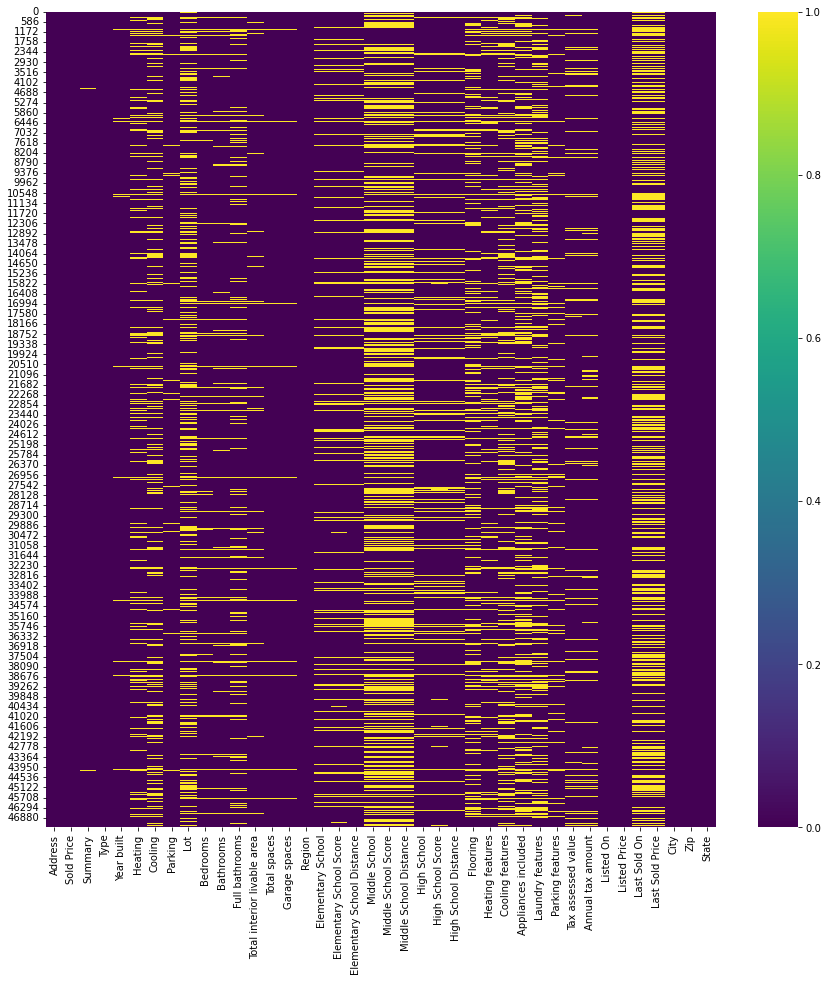

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap='viridis')

In [9]:
train.columns[train.isna().any()]

Index(['Summary', 'Year built', 'Heating', 'Cooling', 'Parking', 'Lot',
       'Bedrooms', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Region', 'Elementary School', 'Elementary School Score',
       'Elementary School Distance', 'Middle School', 'Middle School Score',
       'Middle School Distance', 'High School', 'High School Score',
       'High School Distance', 'Flooring', 'Heating features',
       'Cooling features', 'Appliances included', 'Laundry features',
       'Parking features', 'Tax assessed value', 'Annual tax amount',
       'Last Sold On', 'Last Sold Price'],
      dtype='object')

# I decide to drop "Listed Price" and "Last Sold Price" with related "Listed on" and "Last Sold On" in order to avoid the presence of price references for our analysis and prediction:

In [10]:
train.drop('Listed Price', axis=1,inplace=True)
train.drop('Listed On', axis=1,inplace=True)
train.drop('Last Sold Price', axis=1,inplace=True)
train.drop('Last Sold On', axis=1,inplace=True)


In [11]:
train.drop('Summary',axis=1,inplace=True) #We can drop Summary since descriptions are not relevant for our analysis.

# point out the percentages of missing values for each feature

In [12]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missdata = pd.concat([total,percent],axis=1,keys = ['Total', 'Percent'])
missdata


,Total,Percent
Middle School Score,16705,0.352136
Middle School,16704,0.352115
Middle School Distance,16704,0.352115
Lot,14181,0.298931
Laundry features,14124,0.297730
Appliances included,13442,0.283353
Cooling features,11782,0.248361
Flooring,11564,0.243766
Cooling,10622,0.223909
Full bathrooms,7865,0.165792


In [13]:
train.dtypes

Address                         object
Sold Price                     float64
Type                            object
Year built                     float64
Heating                         object
Cooling                         object
Parking                         object
Lot                            float64
Bedrooms                        object
Bathrooms                      float64
Full bathrooms                 float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Region                          object
Elementary School               object
Elementary School Score        float64
Elementary School Distance     float64
Middle School                   object
Middle School Score            float64
Middle School Distance         float64
High School                     object
High School Score              float64
High School Distance           float64
Flooring                        object
Heating features         

In [14]:
train['Middle School Score'].unique()

array([nan,  2.,  7.,  5.,  8.,  4.,  3.,  6.,  9.,  1.])

In [15]:
train['Middle School Score'].fillna(0.,inplace=True) #Nan simply means no middle school

In [16]:
train['Middle School'].unique()

array([nan, 'John Muir Middle School', 'Culver City Middle School',
       'Atascadero Middle School', 'Presidio Middle School',
       'Buchser Middle School', 'Monroe Middle School',
       'Hoover (Herbert) Middle School', 'Audubon Middle School',
       'Columbia Middle School', 'Borel Middle School',
       'Central Middle School', 'Price Charter Middle School',
       'Piedmont Middle School', 'Isaac Newton Graham Middle School',
       'New Brighton Middle School', 'Edwin Markham Middle School',
       'Marina Del Rey Middle School',
       'Hubert Howe Bancroft Middle School', 'Charles Drew Middle School',
       'Francisco Middle School', 'Bowditch Middle School',
       'Herbert Hoover Middle School', 'El Sereno Middle School',
       'Crittenden Middle School', 'Mission Hill Middle School',
       'John Burroughs Middle School', 'Cupertino Middle School',
       'John F. Kennedy Middle School', 'Roosevelt Middle School',
       'Paul Revere Middle School', 'Tierra Linda Midd

In [17]:
train['Middle School'].fillna('no_midsch',inplace=True) #Nan simply means no middle school

In [18]:
train['Middle School Distance'].unique()

array([ nan,  1.1,  0.2, 10.2,  0.3,  0.9,  1. ,  0.5,  1.6,  0.4,  1.9,
        0.6,  0.7,  1.3,  1.4,  4. ,  1.5,  1.2,  0.1,  1.8,  0.8,  2.4,
        3.5,  2.2,  2. ,  3. ,  2.1,  3.2,  2.5,  3.1,  1.7,  3.3,  2.6,
       11. ,  6.9,  4.3,  5.4,  8. ,  2.9,  4.2,  3.6,  3.7,  9.4,  4.4,
        9.3, 19.1,  4.9,  6.8,  2.8,  2.3,  3.4,  5.2,  4.5,  8.5,  5.8,
       10.5,  2.7,  3.8,  6.1,  6.3,  4.8,  5.9,  6.5,  0. ,  8.6,  6.4,
        8.9,  7.1,  6.7,  5.1,  7.7, 18.5,  8.3,  5.3,  6.2,  7.4,  7.5,
        5.5,  3.9,  5. ,  5.7, 10.7, 11.2,  7.2,  4.1,  6. , 10.4,  7.3,
       13.6, 14.3,  8.2, 10.6,  8.1, 13.8,  8.4,  7.8, 14.2,  9.6,  4.7,
        4.6,  7. ,  7.9,  6.6,  9.7,  9.5, 10.8, 19.8, 10.9, 47.4, 14.4,
        7.6, 19. , 12.2, 18.2, 11.1, 19.4,  9.8, 12.8, 11.6, 21.7,  9.1,
       18.7,  8.8, 13.5,  9. , 10. , 46.5, 13.9,  5.6, 13.4, 10.1, 10.3,
       12.4,  8.7, 18. , 17.7,  9.9, 13.2, 23.2, 14. , 13.3, 47.2,  9.2,
       11.4, 11.5, 21.4, 30.5, 12.5, 21.8, 32.9, 12

In [19]:
train['Middle School Distance'].max()


57.2

In [20]:
train['Middle School Distance'].fillna(100.,inplace=True) 
#Nan means there are no schools around so I decide to imputate an high distance value in order to keep these records anyway


Same consideration for the rest of the schools:

In [21]:
train['High School'].fillna('no_highsch',inplace=True)
train['Elementary School'].fillna('no_elesch',inplace=True)

In [22]:
train['High School Score'].unique()
train['Elementary School Score'].unique()

array([ 7.,  3., nan,  9.,  6.,  8.,  4.,  2.,  5.,  1., 10.])

In [23]:
train['High School Score'].fillna(0.,inplace=True)       #Nan simply means no high school
train['Elementary School Score'].fillna(0.,inplace=True) #Nan simply means no elementary school
                                    

In [24]:
train['High School Distance'].max()

73.9

In [25]:
train['Elementary School Distance'].max()

57.2

In [26]:
#we keep considering around the double of the max value as a congruous assignment
train['High School Distance'].fillna(150.,inplace=True)
train['Elementary School Distance'].fillna(100.,inplace=True)

In [27]:
train['Lot'].describe()


count    3.325800e+04
mean     2.353383e+05
std      1.192507e+07
min      0.000000e+00
25%      4.991000e+03
50%      6.502000e+03
75%      1.045400e+04
max      1.897474e+09
Name: Lot, dtype: float64

I decide to assign the 25th percentile for the missing values

In [28]:
train['Lot'].fillna(4.991000e+03,inplace=True)

filling missing values:

In [29]:
train['Laundry features'].fillna('no_laundry',inplace=True) #Nan simply means no laundry
train['Cooling features'].fillna('no_coolfeat',inplace=True) #Nan simply means no cooling features
train['Heating features'].fillna('no_heatfeat',inplace=True) #Nan simply means no heating features
train['Parking features'].fillna('no_parkfeat',inplace=True) #Nan simply means no parking features
train['Flooring'].fillna('no_infofloor',inplace=True) #Nan simply means no info provided
train['Bedrooms'].fillna('no_infobed',inplace=True) #Nan simply means no info provided
train['Heating'].fillna('no_heating',inplace=True) #Nan simply means no heating
train['Cooling'].fillna('no_cooling',inplace=True) #Nan simply means no cooling
train['Parking'].fillna('no_parking',inplace=True) #Nan simply means no parking
train['Appliances included'].fillna('no_appliances',inplace=True) #Nan simply means no appliances included

In [30]:
#I want to consider only houses built from 1950 to 2022:
train = train[(train['Year built'] > 1950) & (train['Year built']<=2022)] 


In [31]:
train['Year built'].describe()

count    32202.000000
mean      1982.339637
std         20.070035
min       1951.000000
25%       1965.000000
50%       1980.000000
75%       2000.000000
max       2021.000000
Name: Year built, dtype: float64

In [32]:
train['Year built'].fillna(1981.531701,inplace=True)
#I decide to assign the mean value to the missing data

In [33]:
train['Sold Price'].describe()

count    3.220200e+04
mean     1.263295e+06
std      1.719242e+06
min      1.005000e+05
25%      5.500000e+05
50%      9.300000e+05
75%      1.470000e+06
max      9.000000e+07
Name: Sold Price, dtype: float64

In [34]:
train[(train['Sold Price']>2.000000e+07)].count()

Address                        44
Sold Price                     44
Type                           44
Year built                     44
Heating                        44
Cooling                        44
Parking                        44
Lot                            44
Bedrooms                       44
Bathrooms                      41
Full bathrooms                 36
Total interior livable area    38
Total spaces                   44
Garage spaces                  44
Region                         44
Elementary School              44
Elementary School Score        44
Elementary School Distance     44
Middle School                  44
Middle School Score            44
Middle School Distance         44
High School                    44
High School Score              44
High School Distance           44
Flooring                       44
Heating features               44
Cooling features               44
Appliances included            44
Laundry features               44
Parking featur

In [35]:
#I decide to drop very high Sold prices 
train = train[(train['Sold Price']<=2.000000e+07)]

In [36]:
train['Annual tax amount'].describe()

count     29269.000000
mean       9734.462810
std       11671.910449
min           0.000000
25%        3664.000000
50%        7294.000000
75%       11809.000000
max      528249.000000
Name: Annual tax amount, dtype: float64

In [37]:
train['Annual tax amount'].fillna(9673.393186,inplace=True)
#I decide to assign the mean value to the missing data

In [38]:
#same for Tax assessed value
train['Tax assessed value'].fillna(9659.452594,inplace=True)

In [39]:
train['Region'].unique()

array(['Los Altos', 'Strawberry', 'Taylorsville', 'San Francisco',
       'Aptos', 'Santa Clara', 'San Jose', 'Los Angeles', 'Sunnyvale',
       'Compton', 'San Carlos', 'Mountain View', 'Beverly Hills',
       'Capitola', 'Los Gatos', 'West Hollywood', 'Foster City',
       'San Mateo', 'Santa Cruz', 'Cupertino', 'Watsonville', 'San Bruno',
       'Urban', 'Milpitas', 'Saratoga', 'Lockwood', 'Freedom',
       'Ben Lomond', 'Montara', 'Campbell', 'Los Olivos', 'Wallace',
       'Patagonia', 'East Palo Alto', 'Zamora', 'Pacifica', 'Culver City',
       'Manton', 'Loma Mar', 'Coleville', 'Default', 'Le Grand',
       'Playa Vista', 'Point Reyes Station', 'South San Francisco',
       'San Simeon', 'Menlo Park', 'Los Altos Hills', 'San Martin',
       'Woodside', 'Belmont', 'Bradbury', 'Bell', 'Millbrae',
       'Clipper Mills', 'Tubac', 'Carlotta', 'Redwood City', 'Heber',
       'Soquel', 'Royal Oaks', 'Palo Alto', 'Half Moon Bay', 'Felton',
       'Bakersfield', 'Nogales', 'Big Sur', '

In [40]:
train['Region'].fillna('no_Region',inplace=True) #Nan simply means no Region 

In [41]:
train['Bathrooms'].unique()

array([ 0.,  3.,  2., nan,  6.,  1.,  5.,  4.,  8.,  7.,  9., 11., 10.,
       12., 18., 16., 13., 14., 24., 19., 21., 20.])

In [44]:
train['Bathrooms'].fillna(0.,inplace=True) 

In [45]:
train['Garage spaces'].unique()

array([  0.,   4.,   1.,   2.,   3.,   5.,   6.,  30.,   8.,   7.,  10.,
         9.,  11.,  15.,  60., 400.,  18.,  22., 228.,  40., -15.,  12.,
        20.,  13.,  21.,  16.,  14., 920., 819.,  54.,  52.,  25.,  35.,
       744., 130.,  26.,  23.,  -5.,  33., 439.,  58.])

In [41]:
train['Garage spaces'].fillna(0., inplace=True)
train['Total spaces'].fillna(0., inplace=True)


In [45]:
#let's drop negative spaces:
train = train[(train['Garage spaces']>=0)]
train = train[(train['Total spaces'] >=0)]

In [46]:
train['Full bathrooms'].unique()

array([nan,  1.,  2.,  3.,  5.,  4.,  6.,  7., 11.,  8.,  9., 12., 10.])

In [47]:
train['Full bathrooms'].fillna(0., inplace=True)

In [48]:
train['Total interior livable area'].describe()

count    31590.000000
mean      1857.091928
std       1120.235259
min          1.000000
25%       1216.000000
50%       1600.000000
75%       2178.000000
max      35970.000000
Name: Total interior livable area, dtype: float64

In [49]:
train[(train['Total interior livable area']>10000)].count()

Address                        57
Sold Price                     57
Type                           57
Year built                     57
Heating                        57
Cooling                        57
Parking                        57
Lot                            57
Bedrooms                       57
Bathrooms                      57
Full bathrooms                 57
Total interior livable area    57
Total spaces                   57
Garage spaces                  57
Region                         57
Elementary School              57
Elementary School Score        57
Elementary School Distance     57
Middle School                  57
Middle School Score            57
Middle School Distance         57
High School                    57
High School Score              57
High School Distance           57
Flooring                       57
Heating features               57
Cooling features               57
Appliances included            57
Laundry features               57
Parking featur

In [50]:
train[(train['Total interior livable area']<10)].count()

Address                        10
Sold Price                     10
Type                           10
Year built                     10
Heating                        10
Cooling                        10
Parking                        10
Lot                            10
Bedrooms                       10
Bathrooms                      10
Full bathrooms                 10
Total interior livable area    10
Total spaces                   10
Garage spaces                  10
Region                         10
Elementary School              10
Elementary School Score        10
Elementary School Distance     10
Middle School                  10
Middle School Score            10
Middle School Distance         10
High School                    10
High School Score              10
High School Distance           10
Flooring                       10
Heating features               10
Cooling features               10
Appliances included            10
Laundry features               10
Parking featur

In [51]:
#I want to consider total interior livable area from 10 to 10000:
train = train[(train['Total interior livable area'] >=10) & (train['Total interior livable area']<=10000)] 

<AxesSubplot:>

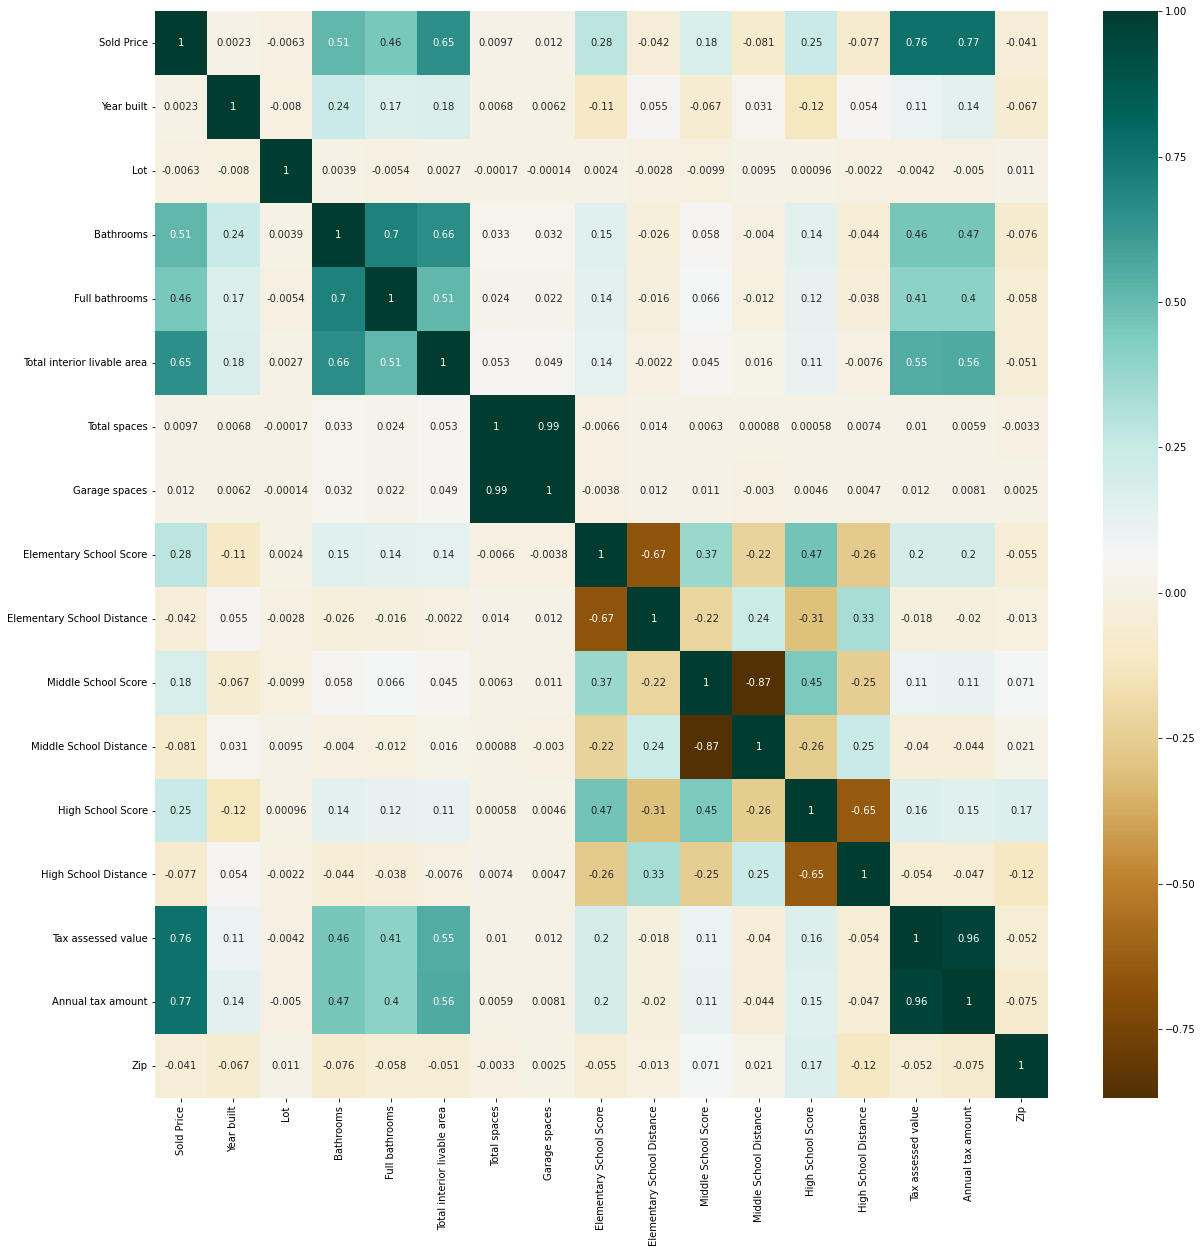

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), cmap = 'BrBG',annot=True)

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = list(train.select_dtypes(include=numerics).columns)
numerical_features
train[numerical_features].corr()['Sold Price'].drop('Sold Price').sort_values(ascending=False)

Annual tax amount              0.765754
Tax assessed value             0.761898
Total interior livable area    0.650699
Bathrooms                      0.513207
Full bathrooms                 0.456722
Elementary School Score        0.283122
High School Score              0.245749
Middle School Score            0.184308
Garage spaces                  0.011832
Total spaces                   0.009702
Year built                     0.002303
Lot                           -0.006323
Zip                           -0.040564
Elementary School Distance    -0.042438
High School Distance          -0.076653
Middle School Distance        -0.081067
Name: Sold Price, dtype: float64

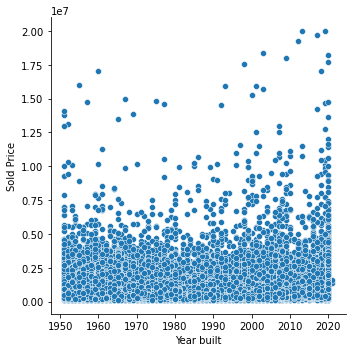

In [54]:
sns.relplot(x = 'Year built', y = 'Sold Price', data = train)

<AxesSubplot:xlabel='Sold Price'>

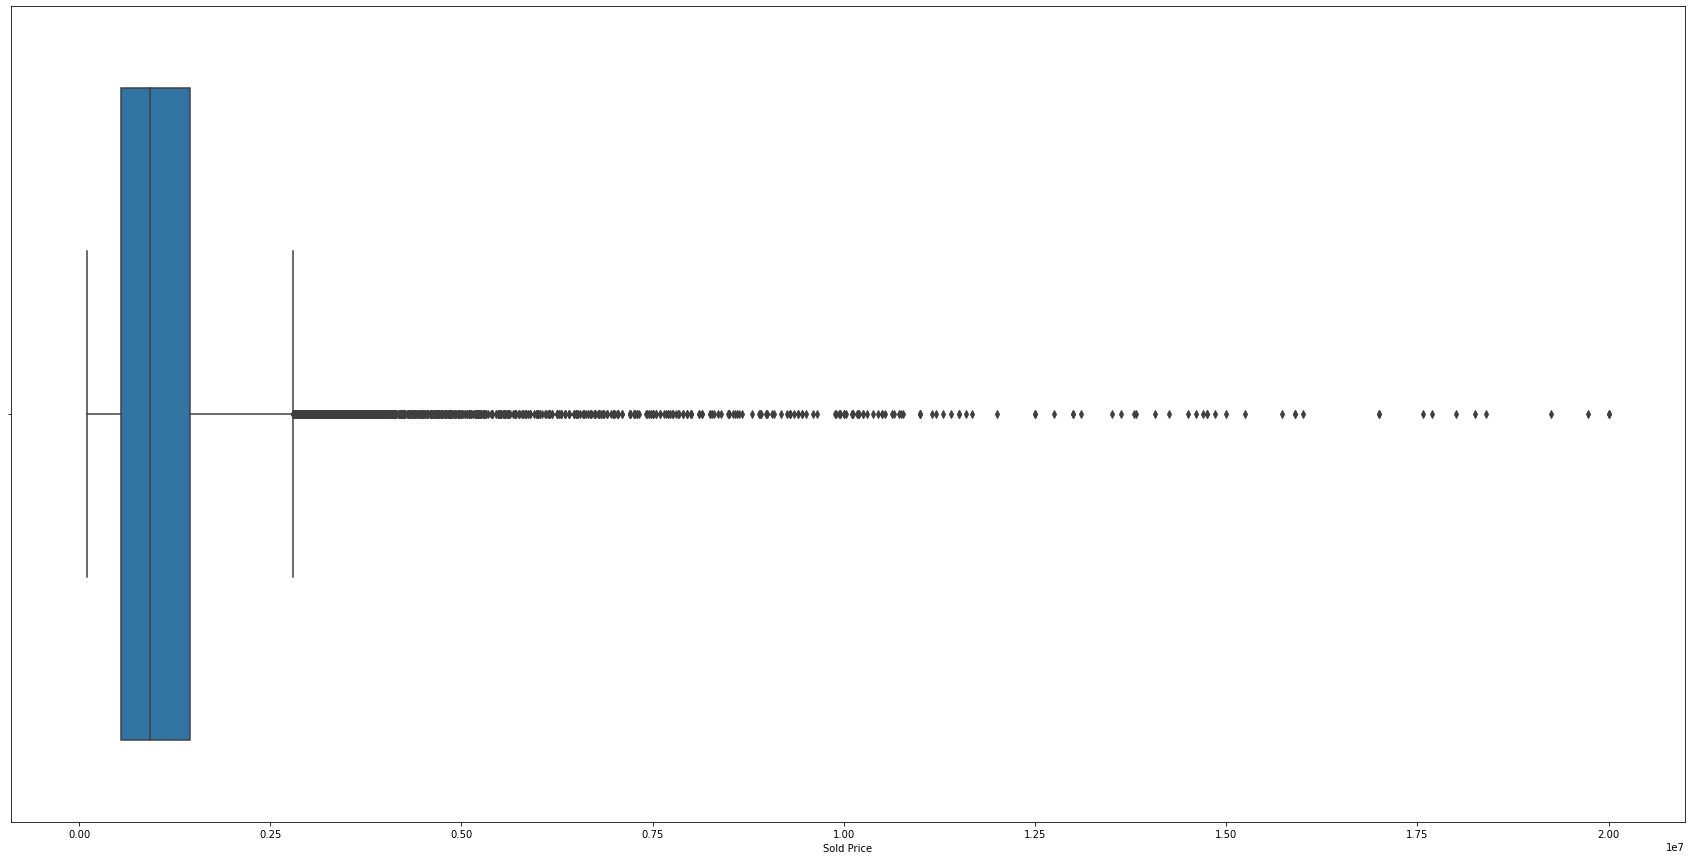

In [55]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Sold Price',data=train)

<AxesSubplot:>

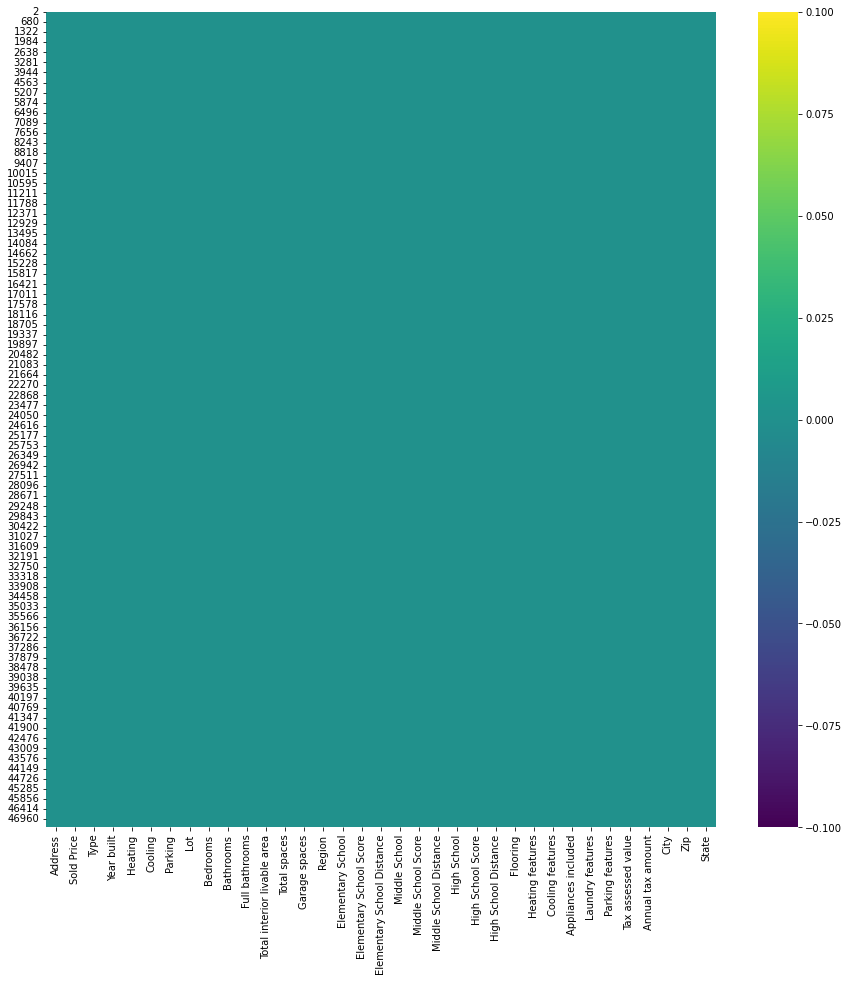

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap='viridis')

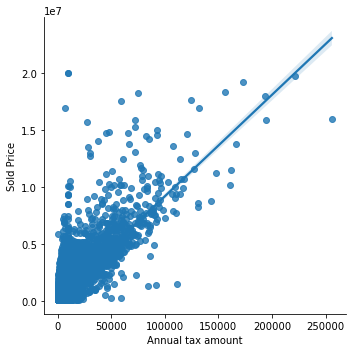

In [58]:
sns.lmplot(x='Annual tax amount',y='Sold Price',data=train)

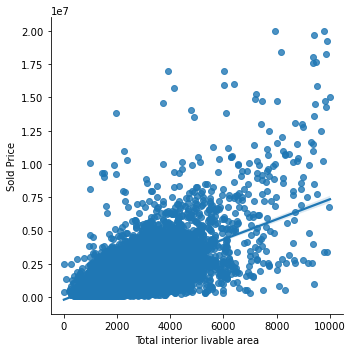

In [59]:
 sns.lmplot(x='Total interior livable area',y='Sold Price',data=train)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
Annual tax amount              0.765754
Tax assessed value             0.761898
Total interior livable area    0.650699
Bathrooms                      0.513207
Full bathrooms                 0.456722
Elementary School Score        0.283122
High School Score              0.245749
Middle School Score            0.184308
Garage spaces                  0.011832
Total spaces                   0.009702
Year built                     0.002303
Lot                           -0.006323
Zip                           -0.040564
Elementary School Distance    -0.042438
High School Distance          -0.076653
Middle School Distance        -0.081067

RMSE: 654339.2884952402


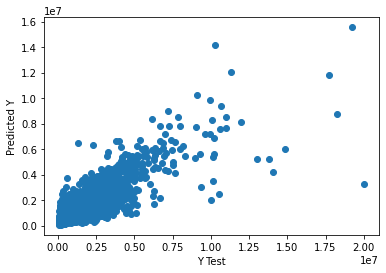

In [61]:
X = train[['Annual tax amount','Tax assessed value','Total interior livable area','Bathrooms']] #4 highest-corr
y = train['Sold Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [62]:
np.mean(train['Sold Price'])

1194875.1706373123

In [63]:
np.std(train['Sold Price'])

1134149.1243003518

In [64]:
#RMSE of predictions is 654,00 k, while average sold price is 1.200,00 k. 
#Let's see if we can improve the result by adding three further features with high correlation:

RMSE: 631186.3208537214


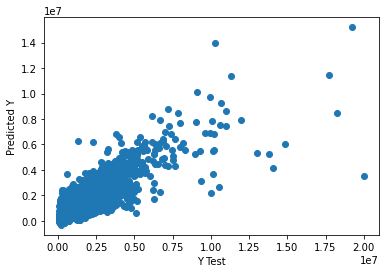

In [69]:
X = train[['Annual tax amount','Tax assessed value','Total interior livable area','Bathrooms','Full bathrooms','Elementary School Score','High School Score','Middle School Score']] 
y = train['Sold Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE down to 631,00 k. So, let's use Ridge and Lasso regularization to find optimal number of features to be included.

Ridge regularization:

In [75]:
X = train[numerical_features].drop('Sold Price',axis=1)
y = train['Sold Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [76]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import RidgeCV
alpha_list = np.logspace(-3, 3, 100)

rid = RidgeCV(cv=5, alphas=alpha_list)
rid.fit(X_train, y_train)
predictions = rid.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('alpha: ',rid.alpha_)

RMSE: 612751.2716504483
alpha:  187.3817422860383


# Best result is with alpha=187 ,where we get an rmse of about 612,00 k

Text(0, 0.5, 'Predicted Y')

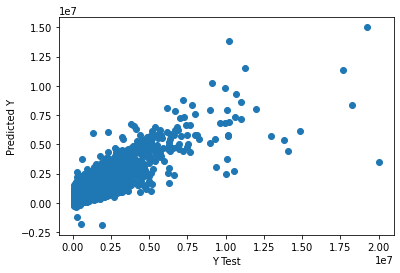

In [78]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Lasso regularization:

RMSE: 612731.7070289453
alpha:  0.001
number of features:  16


Text(0, 0.5, 'Predicted Y')

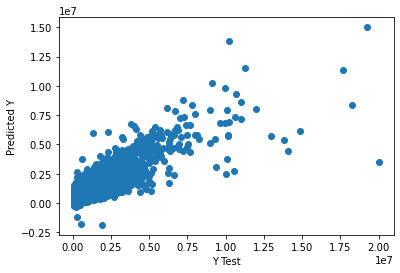

In [82]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LassoCV
alpha_list = np.logspace(-3, 3, 100)

las = LassoCV(cv=5, alphas=alpha_list, random_state=101)
las.fit(X_train, y_train)
predictions = las.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('alpha: ',las.alpha_)
print('number of features: ',np.sum(las.coef_!=0))

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Principal components analysis:

<AxesSubplot:ylabel='Sold Price'>

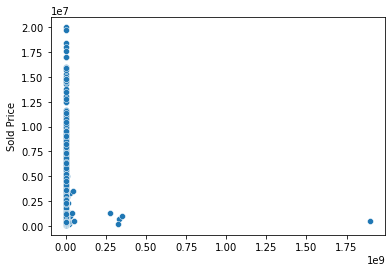

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
sns.scatterplot(X_train_pca[:,0],y_train)

In [88]:
components = [2,3,5,10,12,14,16]
rmse = []
train_score = []
test_score = []
lm = LinearRegression()
    
for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    lm.fit(X_train_pca,y_train)
    predictions = lm.predict(X_test_pca)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    train_score.append(lm.score(X_train_pca,y_train))
    test_score.append(lm.score(X_test_pca,y_test))
    
results_pca = pd.DataFrame(list(zip(components,rmse,train_score,test_score)),
                       columns=['components','rmse','train_score','test_score'])
results_pca

,components,rmse,train_score,test_score
0,2,737215.463877,0.589116,0.559162
1,3,724800.348406,0.604359,0.573885
2,5,655249.049947,0.670639,0.651741
3,10,634424.793412,0.690948,0.673525
4,12,617681.706497,0.707985,0.690529
5,14,613553.553923,0.710859,0.694652
6,16,612731.706976,0.711168,0.695470


# Summary:
#Simple linear regression with 7 top-highest correl. features: RMSE = 631 k
#Linear regression with Ridge regularization: RMSE = 612 k
#Linear regression with Lasso regularization: RMSE = 612 k
#Principal component analysis: RMSE = 612 k